# A closer look at ecosystem services

One feature, that is astonishing so far, is the fact that even when the entire environment goes to shit, income from ecosystem services seems to stay high as long as settlements dont die.
For reference, look at the standard setup of the model.

First, load packages and data to work with

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

Populating the interactive namespace from numpy and matplotlib


In [3]:
loc1 = '/home/jakob/Project_MayaSim/Python/output_data/X4_es_income/results/trajectory'
loc2 = '/home/jakob/Project_MayaSim/Python/output_data/X4_es_income/results/traders_trajectory'
all_cities = pd.read_pickle(loc1)
trade_cities = pd.read_pickle(loc2)
all_cities.head()

key                                                                     mean_trajectories  \
kill_cropless better_ess timesteps observables                                              
False         False      0         es_income_agricultural_productivity           0.134206   
                                   es_income_forest                              0.247784   
                                   es_income_pop_density                         0.000000   
                                   es_income_precipitation                       0.000000   
                                   es_income_waterflow                           0.036835   

key                                                                     sigma_trajectories  
kill_cropless better_ess timesteps observables                                              
False         False      0         es_income_agricultural_productivity            0.001481  
                                   es_income_forest                               0.013448  
                                   es_income_pop_density                          0.000000  
                                   es_income_precipitation                        0.000000  
                                   es_income_waterflow                            0.001867

Look at the state of the ecosystem: forest, soil and waterflow. 

Notably, the ecosystem declines in both conditions. The forest declines even further, if settlements without agriculture are not removed. The difference in soil degradation are negligible.

In [ ]:
pylab.rcParams['figure.figsize'] = (24, 9)
fig = plt.figure()
k = False
for i, t in enumerate([True, False]):
    ax = fig.add_subplot(2,2,i+1)

    all_cities['mean_trajectories'].xs(level=('kill_cropless', 'better_ess'), key=(t, k)).unstack('observables')[['forest_state_3_cells', 'forest_state_2_cells',
       'forest_state_1_cells']].plot.area(ax=ax, color=['g', 'Orange', 'Brown'])
    ax.set_ylim([0, 100000])
    if t:
        ax.set_title('better ecosystem services is {} \n killing settlements without crops is {}'.format('true' if k else 'false', 'true' if t else 'false'))
        pass
    else:
        ax.set_title('killing settlements without crops is {}'.format('true' if t else 'false'))
ax = fig.add_subplot(2, 2, 3)
all_cities['mean_trajectories'].xs(level=('observables', 'better_ess'), key=('mean_soil_degradation', k)).unstack('kill_cropless').plot(ax=ax)
ax.set_ylabel('mean soil degradation')
ax = fig.add_subplot(2, 2, 4)
all_cities['mean_trajectories'].xs(level=('observables', 'better_ess'), key=('mean_waterflow', k)).unstack('kill_cropless').plot(ax=ax)
ax.set_ylabel('mean_precipitation')
fig.tight_layout()

Then look at the income from different parts of the ecosystem.

In the income from ecosystem services the decline in the forest state is not so clearly visible. And especially in the condition with settlements without agriculture staying alive, the income from forest increases, even while the forest stays declined.

I suspect, that the total income from ecosystem services mostly depends on the number of cells that settlements have under their controll. Therefore, I will normalize the income from ecosystem services to settlements' cells in influence.

Also, I find it crude, that agricultural productivity by itself produces ecosystem services, where the medium that actually produces the services relying on agricultural productivity is the forest ecosystem service. I therefore implement an alternative method for calculating income from ecosystem services by multiplying the values of agricultural productivity and forest state (0, 1 or 2) for each cell to get a combined measure that does not allow for full substitution.

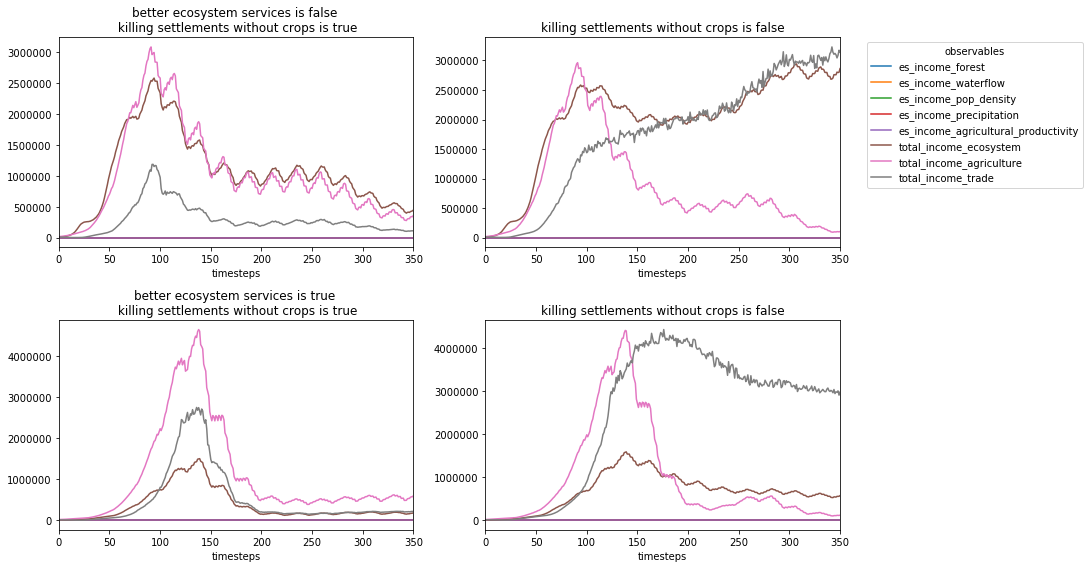

In [18]:
pylab.rcParams['figure.figsize'] = (12, 8)
fig = plt.figure()
for j, k in enumerate([False, True]):
    for i, t in enumerate([True, False]):
        ax = fig.add_subplot(2,2,i+1+2*j)

        ln = all_cities['mean_trajectories'].xs(level=('kill_cropless', 'better_ess'), key=(t, k)).unstack('observables')[
            ['es_income_forest', 'es_income_waterflow',
             'es_income_pop_density', 'es_income_precipitation', 
             'es_income_agricultural_productivity', 'total_income_ecosystem', 'total_income_agriculture',
             'total_income_trade']].plot(ax=ax, legend = not k and not t)
        if t:
            ax.set_title('better ecosystem services is {} \n killing settlements without crops is {}'.format('true' if k else 'false', 'true' if t else 'false'))
            pass
        else:
            ax.set_title('killing settlements without crops is {}'.format('true' if t else 'false'))
        if not k and not t:
            lg = ln.get_legend()
            bb = lg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
            xOffset = .7
            bb.x0 += xOffset
            bb.x1 += xOffset
            lg.set_bbox_to_anchor(bb, transform = ax.transAxes)
            pass
fig.tight_layout()

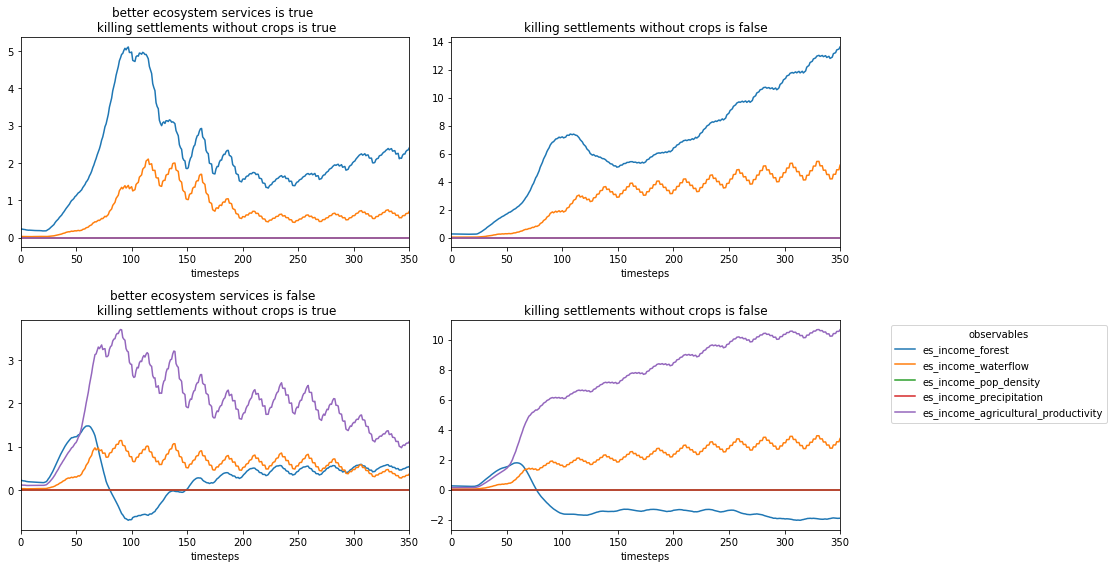

In [13]:
pylab.rcParams['figure.figsize'] = (12, 8)
fig = plt.figure()
for j, k in enumerate([True, False]):
    for i, t in enumerate([True, False]):
        ax = fig.add_subplot(2,2,i+1+2*j)

        ln = all_cities['mean_trajectories'].xs(level=('kill_cropless', 'better_ess'), key=(t, k)).unstack('observables')[['es_income_forest',
       'es_income_waterflow',
       'es_income_pop_density', 'es_income_precipitation', 'es_income_agricultural_productivity']].plot(ax=ax, legend = not k and not t)
        if t:
            ax.set_title('better ecosystem services is {} \n killing settlements without crops is {}'.format('true' if k else 'false', 'true' if t else 'false'))
            pass
        else:
            ax.set_title('killing settlements without crops is {}'.format('true' if t else 'false'))
        if not k and not t: 
            lg = ln.get_legend()
            bb = lg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
            xOffset = .7
            bb.x0 += xOffset
            bb.x1 += xOffset
            lg.set_bbox_to_anchor(bb, transform = ax.transAxes)
            pass
fig.tight_layout()